# Getting Started Notebook

In [1]:
## Imports
import cv2
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Loading in data

Jupyter allows the use of markdown cells, so you can write out longer comments and break up sections of code accordingly

In [2]:
# read in train.csv into Pandas DataFrame
df = pd.read_csv("./train.csv")

In [3]:
# you can get the content inside a variable by just typing the var name
df

,image,label
0,images\train\img1689.jpg,0
1,images\train\img1690.jpg,2
2,images\train\img1691.jpg,2
3,images\train\img1692.jpg,3
4,images\train\img1693.jpg,2
...,...,...
3937,images\train\img5626.jpg,3
3938,images\train\img5627.jpg,1
3939,images\train\img5628.jpg,0
3940,images\train\img5629.jpg,3


In [4]:
# make sure that the images folder is in the same directory as the Jupyter notebook
# that way you can read in images directly from the DataFrame
img = cv2.imread(df["image"][0])

In [5]:
img.shape

(256, 256, 3)

In [6]:
# read in all images and labels from DataFrame
images = []
labels = []
for idx in range(len(df)):
    img = cv2.imread(df.iloc[idx]["image"])
    # OpenCV reads in images in BGR but matplotlib reads in RGB
    # displaying an opencv image in matplotlib will result in differences
    # the easiest way is to have cv explicitly read in RGM
    images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    labels.append(df.iloc[idx]["label"])

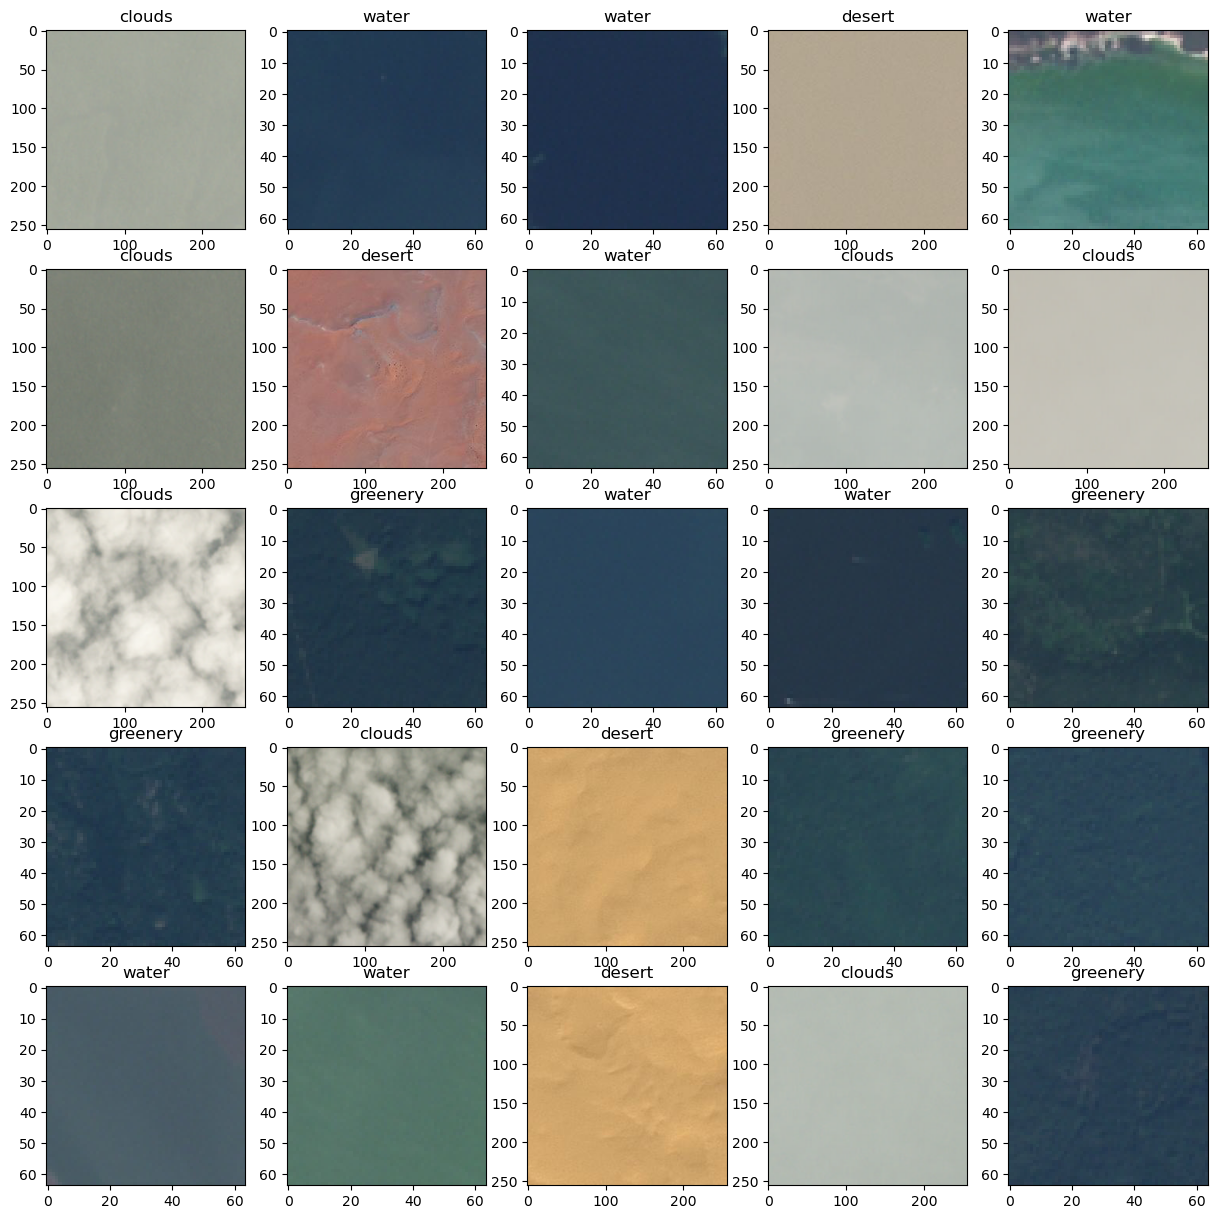

In [7]:
# display images on a grid

# set number of rows and columns of grid
rows=5
cols=5
# counter for images
img_count=0
# conversion from label to text category
label_to_category_dict = {0:"clouds", 1:"greenery", 2:"water", 3:"desert"}
# create subplot
fig,axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
# loop through and displays first 25 images
# NOTE: matplotlib automatically resizes the images, these are NOT true to size
for i in range(rows):
    for j in range(cols):
        if img_count < len(images):
            axes[i,j].imshow(images[img_count])
            axes[i,j].title.set_text(label_to_category_dict[labels[img_count]])
            img_count+=1

## References:

https://kanokidotorg.github.io/2021/05/11/Show-images-in-grid-inside-jupyter-notebook-using-matplotlib-and-numpy/